# Setup

Rotem Gonen- 318321064
Omer Shik- 318948460

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords   
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bgdog\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("spam_ham_dataset.csv")

creating new tokenized column in the DF 

In [3]:
df['tokenized_text'] = df['text'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize) 

# Counducting EDA

Adding text length column to to dataset

In [4]:
df["text_len"] = df.tokenized_text.map(lambda x: len(x))

<AxesSubplot:title={'center':'count of email in dataset by label'}, xlabel='label'>

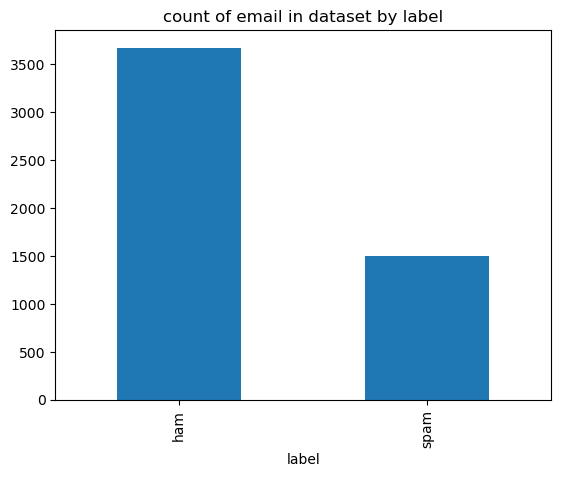

In [5]:
df.groupby(['label'])['text'].count().plot(kind='bar', title='count of email in dataset by label')

When performing EDA we will use the average amount of words per label. because there isn't a balanced number of records.

<AxesSubplot:title={'center':'the average amount of words by label'}, xlabel='label'>

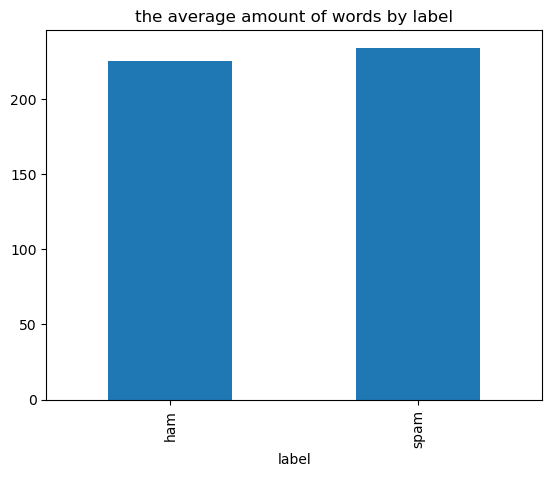

In [6]:
df.groupby(['label'])['text_len'].mean().plot(kind='bar',title='the average amount of words by label')


<AxesSubplot:title={'center':'the average amount of stop words by label'}, xlabel='label'>

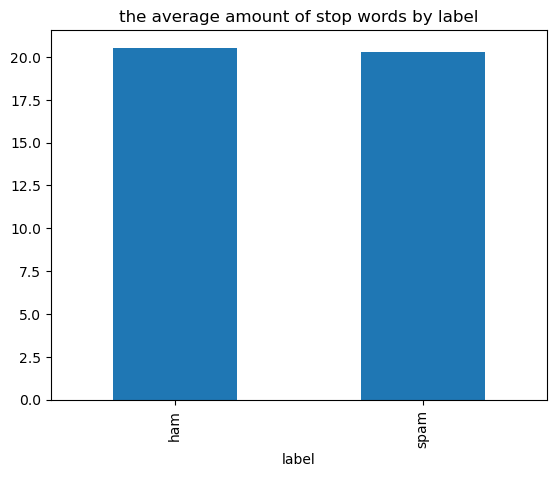

In [7]:
stop_words = set(stopwords.words('english'))
df['stopword'] = df.tokenized_text.apply(lambda x: len(set(x) & stop_words))
df.groupby(['label'])['stopword'].mean().plot(kind='bar',title='the average amount of stop words by label')

It seems that there isn't a major difference between the amount of words and stopwords between labels.

# Creating BOW features

Creating features for the data by using Bag Of Word   

In [8]:
# this function cleaning each mail and remove stopwords.
def text_cleaning(texts):

    clean_text = []

    for text in texts:
        text = re.sub("[^a-zA-Z1-9]", " ", text) 
        text = text.lower().split()                             
        stop_word_list = set(stopwords.words("english"))                  
        text = [word for word in text if not word in stop_word_list] 
        clean_text.append((" ".join(text)))
        
    return clean_text


clean_text = text_cleaning(df['text'])


vectorizer = CountVectorizer() 
clean_text= (vectorizer.fit_transform(clean_text)).toarray()

# Running the models

In [9]:
X_train, X_test, y_train, y_test = train_test_split(clean_text, df['label_num'] , test_size=0.33, random_state=10)

In [10]:
accuracy, precision, recall, models, F1 = {}, {}, {}, {},{}



# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    F1[key] = f1_score(predictions, y_test)

c:\Users\bgdog\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [11]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall','F1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = recall.values()
df_model

,Accuracy,Precision,Recall,F1
Logistic Regression,0.979496,0.978516,0.954286,0.954286
Decision Trees,0.947276,0.900391,0.922000,0.922000
Random Forest,0.973638,0.964844,0.948177,0.948177
K-Nearest Neighbor,0.800234,0.960938,0.605166,0.605166


According to the results, logistic regression is the best model to determine if an email is spam because all of the metrics are highest in this table.